In [299]:
import pandas as pd
import numpy as np
import seaborn as sns

### Задача: Предсказать, заплатит ли гном за напиток в баре (default)
- Выбрать и настроить модель
- Исключить ненужные признаки
- Сделать предсказания вероятностей дефолта для файла `test.csv`
### Модель считается успешной, если значение roc-auc для нее будет больше `0.7`

In [300]:
train = pd.read_csv('train.csv')

In [301]:
train.head()

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender,Default
0,22487461,2015-11-05,2015-08-29,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,8,2.5,-3,5,36.0,Male,0
1,62494261,2016-08-26,2015-12-21,3.5,-2.0,5.0,2016-07-30,2.0,Tavern_district_4,7,2.5,-3,14,3.5,-3,5,29.0,Female,1
2,34822849,2016-02-18,2015-11-11,NaN,NaN,NaN,NaN,0.0,Tavern_district_6,7,2.5,-3,8,2.5,-3,5,56.0,Female,0
3,46893387,2016-04-30,2016-03-22,NaN,NaN,NaN,NaN,0.0,Tavern_district_2,13,2.5,-2,5,2.5,-3,5,27.0,Female,0
4,67128275,2016-09-19,2016-07-21,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,39,2.5,-3,7,2.5,-3,5,37.0,Female,0


In [302]:
train.describe()

,Deal_id,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,Successful_deals_count,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Default
count,3.168000e+03,535.000000,535.000000,535.000000,3154.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.0,3168.000000,3168.000000
mean,4.605727e+07,3.935514,-2.299065,5.267290,1.043754,13.350694,2.518939,-2.404356,8.462437,3.193813,-2.981692,5.0,36.411616,0.110795
std,5.370953e+07,0.888467,0.734579,0.498645,1.649416,8.851891,0.351308,2.474564,3.521127,2.048743,0.245540,0.0,10.821444,0.313928
min,5.856790e+05,2.500000,-3.000000,5.000000,0.000000,2.000000,2.500000,-3.000000,5.000000,2.500000,-3.000000,5.0,20.000000,0.000000
25%,2.761608e+07,3.500000,-3.000000,5.000000,0.000000,7.000000,2.500000,-3.000000,6.000000,2.500000,-3.000000,5.0,28.000000,0.000000
50%,4.349426e+07,3.500000,-2.000000,5.000000,0.000000,8.000000,2.500000,-3.000000,8.000000,2.500000,-3.000000,5.0,34.000000,0.000000
75%,5.778544e+07,4.500000,-2.000000,5.000000,2.000000,15.000000,2.500000,-3.000000,10.000000,2.500000,-3.000000,5.0,43.000000,0.000000
max,6.927701e+08,9.500000,2.000000,8.000000,17.000000,58.000000,17.500000,78.000000,29.000000,37.500000,4.000000,5.0,72.000000,1.000000


In [303]:
train.isna().sum()

Deal_id                      0
Deal_date                    0
First_deal_date              0
Secret_dwarf_info_1       2633
Secret_dwarf_info_2       2633
Secret_dwarf_info_3       2633
First_default_date        2633
Successful_deals_count      14
Region                       7
Tavern                       0
Hashed_deal_detail_1         0
Hashed_deal_detail_2         0
Hashed_deal_detail_3         0
Hashed_deal_detail_4         0
Hashed_deal_detail_5         0
Hashed_deal_detail_6         0
Age                          0
Gender                       0
Default                      0
dtype: int64

<Axes: xlabel='Default', ylabel='Count'>

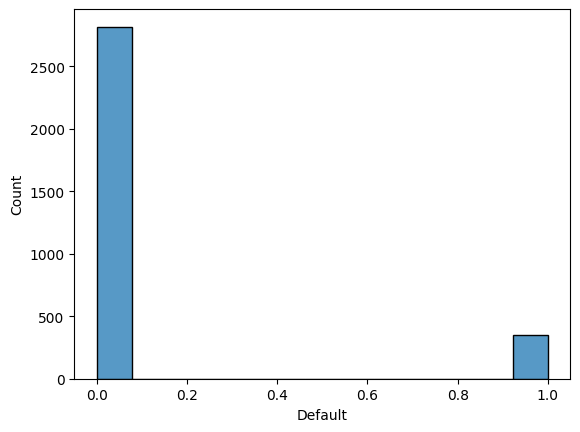

In [304]:
sns.histplot(train['Default'])

### Какие выводы можно сделать прямо сейчас:
1) Есть большое количество пропущенных данных `Secret_dwarf_info`
2) Объекты выборки распределенны по классам неравномерно - примерно 1 к 9
3) Требуется перевести атрибуты `Region`, `Gender` в численный вид
4) Перевести `First_deal_date`, `First_default_date` в разницу в днях между ними
5) Сбросить ненужные для обучения атрибуты

Переведем категориальные атрибуты, представленные строками в численный вид

In [305]:
train['Region'] = train['Region'].astype('category').cat.codes
train['Tavern'] = train['Tavern'].astype('category').cat.codes
train['Gender'] = train['Gender'].astype('category').cat.codes

Создадим атрибут, представляющий кол-во дней с первой сделки до первого дефолта

In [306]:
train['First_deal_date'] = pd.to_datetime(train['First_deal_date'])
train['First_default_date'] = pd.to_datetime(train['First_default_date'])
train['Deal_date'] = pd.to_datetime(train['Deal_date'])
train['days_from_first_deal'] = (train['Deal_date'] - train['First_deal_date']).dt.days
train['days_from_first_default'] = (train['Deal_date'] - train['First_default_date']).dt.days

Удалим ненужные атрибуты

In [307]:
train.drop(['Deal_id', 'Deal_date', 'First_deal_date', 'First_default_date'], axis=1, inplace=True)

Вот так теперь выглядят наши данные

In [308]:
train.head()

,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender,Default,days_from_first_deal,days_from_first_default
0,NaN,NaN,NaN,0.0,3,1,2.5,-3,8,2.5,-3,5,36.0,1,0,68,NaN
1,3.5,-2.0,5.0,2.0,4,1,2.5,-3,14,3.5,-3,5,29.0,0,1,249,27.0
2,NaN,NaN,NaN,0.0,6,1,2.5,-3,8,2.5,-3,5,56.0,0,0,99,NaN
3,NaN,NaN,NaN,0.0,2,4,2.5,-2,5,2.5,-3,5,27.0,0,0,39,NaN
4,NaN,NaN,NaN,0.0,4,12,2.5,-3,7,2.5,-3,5,37.0,0,0,60,NaN


Заполним пропуски по методу MICE

In [309]:
from statsmodels.imputation.mice import MICEData

mice_data = MICEData(train.drop(['Default'], axis=1))
train_imputed = mice_data.data

In [310]:
train_imputed.head()

,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender,days_from_first_deal,days_from_first_default
0,3.5,-2.0,5.0,0.0,3,1,2.5,-3,8,2.5,-3,5,36.0,1,68,112.0
1,3.5,-2.0,5.0,2.0,4,1,2.5,-3,14,3.5,-3,5,29.0,0,249,27.0
2,3.5,-2.0,5.0,0.0,6,1,2.5,-3,8,2.5,-3,5,56.0,0,99,112.0
3,3.5,-2.0,5.0,0.0,2,4,2.5,-2,5,2.5,-3,5,27.0,0,39,112.0
4,3.5,-2.0,5.0,0.0,4,12,2.5,-3,7,2.5,-3,5,37.0,0,60,112.0


### Так как данные распределены по классам неравномерно, будем использовать именно __сбалансированную__ модель случайного леса.
Тестировать модель будем на кросс-валидации

In [311]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

Создадим объекты модели, разделителя выборок. Выделим данные

In [312]:
clf = BalancedRandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

X = train_imputed.values
y = train['Default']

Напишем простую функцию для автоматизации кросс-валидации

In [313]:
def kfold_test(X, y, model, lossfn, kf):
    scores = []

    # Выполняем KFold перекрестную проверку
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Обучаем модель
        model.fit(X_train, y_train)
        
        # Делаем предсказания
        y_pred = model.predict(X_test)
        
        # Оцениваем точность
        score = lossfn(y_test, y_pred)
        scores.append(score)

    # Средняя точность
    mean_accuracy = np.mean(scores)
    return mean_accuracy, scores

Протестируем модель на всех признаках, настраивать гиперпараметры не будем.

In [ ]:
mean_score, scores = kfold_test(X, y, clf, roc_auc_score, kf)

In [315]:
print(f'Mean roc-auc score: {mean_score}')

Mean roc-auc score: 0.676248709140694


Мы близки к необходимому результату. Попробуем убирать признаки для обучения, пока показатели модели будут расти. Каждый раз убирать будем признак, без которого модель покажет наилучший результат на итерации.

In [ ]:
columns = train.columns.tolist()
columns.remove('Default')

dropping = pd.DataFrame(columns=["dropped_attribute", "score"])
y = train['Default']

for column in columns:
    X =  train_imputed.drop(column, axis=1).values
    dropping.loc[len(dropping)] = {'dropped_attribute' : column, "score" : kfold_test(X, y, clf, roc_auc_score, kf)[0]}

In [ ]:
dropping.sort_values(by="score")

,dropped_attribute,score
12,Age,0.648422
5,Tavern,0.666405
15,days_from_first_default,0.668642
13,Gender,0.669829
0,Secret_dwarf_info_1,0.670179
3,Successful_deals_count,0.672827
14,days_from_first_deal,0.677043
9,Hashed_deal_detail_4,0.677490
1,Secret_dwarf_info_2,0.680953
8,Hashed_deal_detail_3,0.684146


In [ ]:
dropping.loc[dropping['score'].idxmax()]['dropped_attribute']

'Hashed_deal_detail_2'

Мы нашли признак, убрав который, мы улучшим точность модели.
Попробуем убрать еще один

In [ ]:
X = train_imputed.drop(['Hashed_deal_detail_2'], axis=1)

In [ ]:
columns.remove('Hashed_deal_detail_2')

In [ ]:
dropping = pd.DataFrame(columns=["dropped_attribute", "score"])

for column in columns:
    X =  train_imputed.drop(column, axis=1).values
    dropping.loc[len(dropping)] = {'dropped_attribute' : column, "score" : kfold_test(X, y, clf, roc_auc_score, kf)[0]}

In [ ]:
dropping.sort_values(by='score')

,dropped_attribute,score
11,Age,0.653940
14,days_from_first_default,0.669996
0,Secret_dwarf_info_1,0.671258
2,Secret_dwarf_info_3,0.673107
8,Hashed_deal_detail_4,0.674601
6,Hashed_deal_detail_1,0.679577
12,Gender,0.681486
1,Secret_dwarf_info_2,0.681802
13,days_from_first_deal,0.682301
9,Hashed_deal_detail_5,0.684812


- Результаты упали, значит, больше признаков убирать не надо
- Попробуем подобрать гиперпараметры

In [ ]:
model_params = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'min_samples_split', 'score'])
X = train_imputed.drop("Hashed_deal_detail_2", axis=1).values

In [ ]:
for max_depth in range(50, 1050, 50):
    for min_samples_leaf in range(1, 11, 1):
        for min_samples_split in [2, 3, 4, 5, 10]:
            clf = BalancedRandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
            model_params.loc[len(model_params)] = {
                "max_depth" : max_depth, 
                "min_samples_leaf" : min_samples_leaf,
                "min_samples_split" : min_samples_split, 
                "score" : kfold_test(X, y, clf, roc_auc_score, kf)
                }

In [ ]:
model_params['mean_score'] = model_params['score'].apply(lambda x: x[0])

In [ ]:
model_params.sort_values(by='mean_score')

,max_depth,min_samples_leaf,min_samples_split,score,mean_score
799,800,10,10,"(0.6671255726462555, [0.6448367640954265, 0.66...",0.667126
755,800,2,2,"(0.6691868231923878, [0.6504651673870048, 0.65...",0.669187
399,400,10,10,"(0.6708359346064616, [0.6507948135667716, 0.67...",0.670836
978,1000,6,5,"(0.6708395211722287, [0.6492930920811661, 0.67...",0.670840
816,850,4,3,"(0.6710953317734587, [0.6588162039411032, 0.67...",0.671095
...,...,...,...,...,...
954,1000,1,10,"(0.7010064999261182, [0.6885576148267525, 0.69...",0.701006
354,400,1,10,"(0.7012874580653922, [0.6716235684809415, 0.69...",0.701287
82,100,7,4,"(0.7014069173747685, [0.6948453104778648, 0.67...",0.701407
17,50,4,4,"(0.7015101453776491, [0.6921715136864209, 0.71...",0.701510


- Мы нашли гиперпараметры, при которых модель удовлетворяет условию успешности. 
- Можно попробовать еще сильнее улучшить результат, убрав признак, при этом задавая модель с подобранными гиперпараметрами.

In [ ]:
dropping = pd.DataFrame(columns=["dropped_attribute", "score"])
clf = BalancedRandomForestClassifier(min_samples_leaf=2, min_samples_split=10, max_depth=600)
X = train_imputed.drop(['Hashed_deal_detail_2'], axis=1)
columns.remove('Hashed_deal_detail_2')
for column in columns:
    X =  train_imputed.drop(column, axis=1).values
    dropping.loc[len(dropping)] = {'dropped_attribute' : column, "score" : kfold_test(X, y, clf, roc_auc_score, kf)[0]}

In [332]:
dropping.sort_values(by='score')

,dropped_attribute,score
11,Age,0.655366
14,days_from_first_default,0.667650
10,Hashed_deal_detail_6,0.677062
12,Gender,0.680664
6,Hashed_deal_detail_1,0.681937
2,Secret_dwarf_info_3,0.682425
0,Secret_dwarf_info_1,0.682987
13,days_from_first_deal,0.683946
4,Region,0.684790
9,Hashed_deal_detail_5,0.684846


Результаты снова упали. Значит, больше признаков убирать не надо.

Теперь, сделаем расчеты вероятностей дефолта гнома для файла `test.csv`

In [354]:
test = pd.read_csv('test.csv')
test.head()

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender
0,72875713,2016-10-14,2015-09-20,NaN,NaN,NaN,NaN,0.0,Tavern_district_2,7,2.5,-3,18,2.5,-3,5,40.0,Female
1,75825544,2016-10-23,2015-06-16,NaN,NaN,NaN,NaN,6.0,Tavern_district_3,18,2.5,-2,15,3.5,-3,5,66.0,Female
2,81809181,2016-11-17,2016-09-11,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,7,2.5,-3,5,36.0,Female
3,87083256,2016-12-26,2016-06-25,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,7,2.5,-2,6,2.5,2,5,32.0,Female
4,84651519,2016-12-07,2016-10-15,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,6,2.5,-3,5,37.0,Female


In [355]:
test.isna().sum()

Deal_id                     0
Deal_date                   0
First_deal_date             0
Secret_dwarf_info_1       849
Secret_dwarf_info_2       849
Secret_dwarf_info_3       849
First_default_date        849
Successful_deals_count      1
Region                      4
Tavern                      0
Hashed_deal_detail_1        0
Hashed_deal_detail_2        0
Hashed_deal_detail_3        0
Hashed_deal_detail_4        0
Hashed_deal_detail_5        0
Hashed_deal_detail_6        0
Age                         0
Gender                      0
dtype: int64

Проведем процедуры подготовки данных. Точно такие же, как для тренировочных

In [356]:
test['Region'] = test['Region'].astype('category').cat.codes
test['Tavern'] = test['Tavern'].astype('category').cat.codes
test['Gender'] = test['Gender'].astype('category').cat.codes

In [357]:
test['First_deal_date'] = pd.to_datetime(test['First_deal_date'])
test['First_default_date'] = pd.to_datetime(test['First_default_date'])
test['Deal_date'] = pd.to_datetime(test['Deal_date'])
test['days_from_first_deal'] = (test['Deal_date'] - test['First_deal_date']).dt.days
test['days_from_first_default'] = (test['Deal_date'] - test['First_default_date']).dt.days

In [358]:
ids = test['Deal_id']

In [359]:
test.drop(['Deal_id', 'Deal_date', 'First_deal_date', 'First_default_date'], axis=1, inplace=True)

from statsmodels.imputation.mice import MICEData

mice_test_data = MICEData(test)
test_imputed = mice_test_data.data

Задаим модель с оптимальными гиперпараметрами.

In [360]:
model = BalancedRandomForestClassifier(min_samples_leaf=2, min_samples_split=10, max_depth=600)

Обучим модель.

In [ ]:
model.fit(train_imputed.drop("Hashed_deal_detail_2", axis=1).values, train['Default'])

In [362]:
model.classes_

array([0, 1])

Сделаем предсказаения вероятностей, не классов

In [365]:
predictions = pd.DataFrame(columns=['Deal_id', 'Default'])
predictions['Deal_id'] = ids
predictions['Prediction'] = model.predict_proba(test_imputed.drop('Hashed_deal_detail_2', axis=1).values)[:, 1]

Сохраним результаты в файл 

In [367]:
predictions.to_csv('predictions.csv')